In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import os

In [11]:
ABS_PATH = os.path.abspath("")
IMG_PATH = os.path.join(ABS_PATH, "images")

frames = {}
img_names = []
for root, dirs, fnames in os.walk(IMG_PATH):
    fnames = [fname for fname in fnames if fname.lower().endswith(".jpg") or fname.lower().endswith(".png")]
    for fname in fnames:
        frames[fname] = plt.imread(os.path.join(root, fname))
    img_names += fnames

In [14]:
freq = np.fft.fft2(frames[img_names[1]])
freq = np.abs(freq)

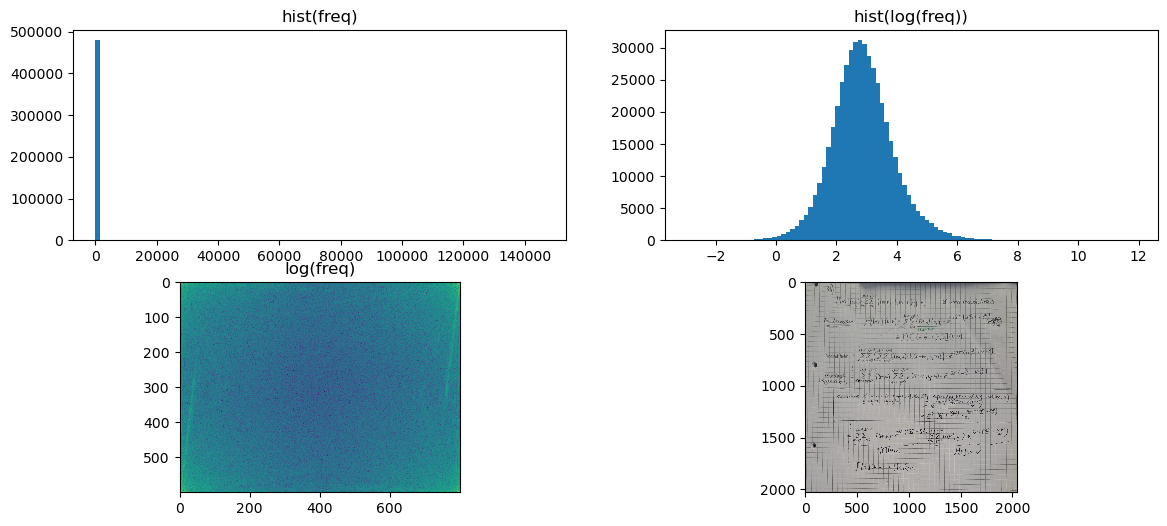

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))
ax[0,0].hist(freq.ravel(), bins=100)
ax[0,0].set_title('hist(freq)')
ax[0,1].hist(np.log(freq).ravel(), bins=100)
ax[0,1].set_title('hist(log(freq))')
ax[1,0].imshow(np.log(freq), interpolation="none")
ax[1,0].set_title('log(freq)')
ax[1,1].imshow(frames[img_names[0]], interpolation="none")

**b)** First implement a one-dimensional discrete version of Fourier transform, i.e. use the formula
$$ c_n = \sum_{x=0}^{L-1} f(x)\cdot e^{-\tfrac{2\pi i\cdot n}{L}\cdot x} \qquad \text{for $n=0,\ldots,L-1$}$$
for complex valued coefficients.

Plot the graph and the results of your Fourier transform, using the Matplotlib function `plot()`, for different functions. Compare your results with the output of the function `numpy.fft.fft`.

In [180]:
import timeit


def fourier1d1(frame):
    out = []
    M = frame.shape[0]
    for u in np.arange(M):
        res = (frame * np.exp(-(2*np.pi*1j*u/M)*np.arange(M))).sum()
        out.append(res)
    return np.array(out)


def fourier1d2(frame):   
    exponent = -2 * np.pi * 1j * np.arange(frame.shape[0])/frame.shape[0] 
    exponent = exponent[:, None] * np.arange(frame.shape[0])
    res = frame * np.exp(exponent)
    sum = res.sum(axis=-1)
    return sum


def fourier1d3(frame):   
    return frame*np.exp((-2 * np.pi * 1j * np.arange(frame.shape[0])/frame.shape[0])[:, None] * np.arange(frame.shape[0])).sum(axis=-1)


res1 = fourier1d1(np.sin(np.arange(50)))
res2 = fourier1d2(np.sin(np.arange(50)))
res2 = fourier1d3(np.sin(np.arange(50)))
res3 = np.fft.fft(np.sin(np.arange(50)))



execution_time1 = timeit.timeit('fourier1d1(np.sin(np.arange(250)))', globals=globals(), number=1000)
execution_time2 = timeit.timeit('fourier1d2(np.sin(np.arange(250)))', globals=globals(), number=1000)
execution_time3 = timeit.timeit('fourier1d3(np.sin(np.arange(250)))', globals=globals(), number=1000)
execution_time4 = timeit.timeit('np.fft.fft(np.sin(np.arange(250)))', globals=globals(), number=1000)


print(execution_time1)
print(execution_time2)
print(execution_time3)
print(execution_time4)


# fig = plt.figure(figsize=(15,5))
# plt.plot(res1)
# plt.plot(res2)
# plt.plot(res3)

8.097308299969882
4.999605699966196
4.95519670000067
0.01381299999775365


$$c_n =\sum_{x=0}^{N-1}f(x)\cdot w_n(x)= \sum_{x=0}^{N-1}f(x)\cdot \mathrm{e}^{-\frac{2\pi i n}{L}x}$$

$$F(x) =\frac{1}{N-1}\sum_{n=0}^{N-1}c_n\cdot w_n(x)= \frac{1}{N-1}\sum_{n=0}^{N-1}c_n\cdot \mathrm{e}^{-\frac{2\pi i n}{L}x}$$

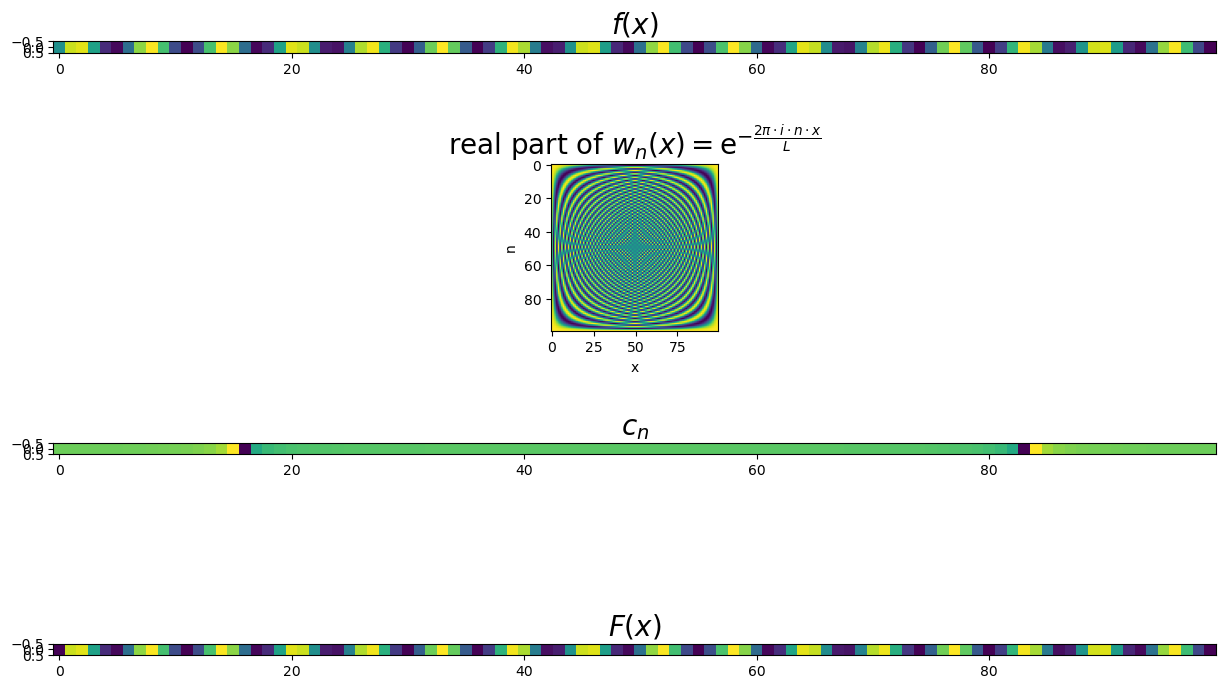

In [16]:
N = 100
coeffs = []
waves = np.exp(-1j * 2 * np.pi * (np.arange(N)/(N-1))[:, None] * np.arange(100))

f = np.sin(np.arange(100))


for n in range(N):
    c =  np.sum(f * waves[n])
    coeffs.append(c)


fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,10))

ax1.imshow(np.sin(np.arange(100)).reshape(1,-1))
ax1.set_title(r"$f(x)$", fontsize=20)


ax2.imshow(np.exp(-1j*2*np.pi*(np.arange(N)/(N-1))[:, None]*np.arange(100)).real.reshape(N, 100))
ax2.set_title(r"real part of $w_n(x)=\mathrm{e}^{-\frac{2\pi\cdot i\cdot n\cdot x}{L}}$", fontsize=20)
ax2.set_xlabel("x")
ax2.set_ylabel("n");


ax3.imshow(np.array(coeffs).real.reshape(1,-1))
ax3.set_title(r"$c_n$", fontsize=20)


res = np.zeros(100, dtype=complex)
waves = np.exp(1j * 2 * np.pi * (np.arange(N)/(N-1))[:, None] * np.arange(100))

for i in range(n):
    res += coeffs[i] * waves[i]

res /= N

ax4.imshow(res.real.reshape(1,-1))
ax4.set_title(r"$F(x)$", fontsize=20);


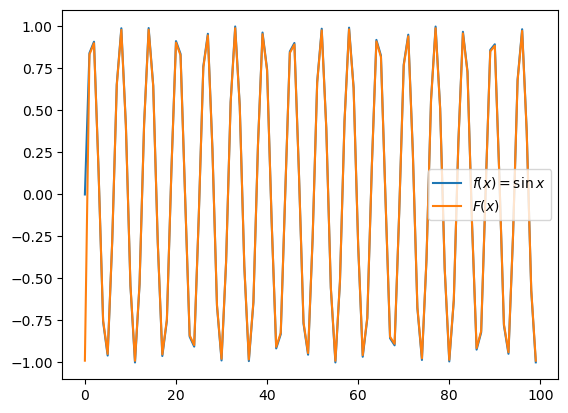

In [17]:
res = np.zeros(100, dtype=complex)
waves = np.exp(1j * 2 * np.pi * (np.arange(N)/(N-1))[:, None] * np.arange(100))

for i in range(n):
    res += coeffs[i] * waves[i]
res /= N




plt.plot(np.sin(np.arange(100)), label=r"$f(x)=\sin x$")
plt.plot(res.real, label=r"$F(x)$")
plt.legend()


$$\sum_{u=0}^{U-1} \sum_{v=0}^{V-1} \mathrm{e}^{-2\cdot \pi i(\frac{u}{U}+\frac{v}{V})x^2}$$

$$\displaystyle w_{uv}(x,y)=\sum_{x=0}^{U-1} \sum_{y=0}^{V-1} \mathrm{e}^{-2\cdot \pi i(\frac{u}{U}x+\frac{v}{V}y)}$$

$$\displaystyle F(x,y)=f(x,y)w_{uv}(x,y)=\sum_{x=0}^{U-1} \sum_{y=0}^{V-1} f(x,y)\mathrm{e}^{-2\cdot \pi i(\frac{u}{U}x+\frac{v}{V}y)}$$

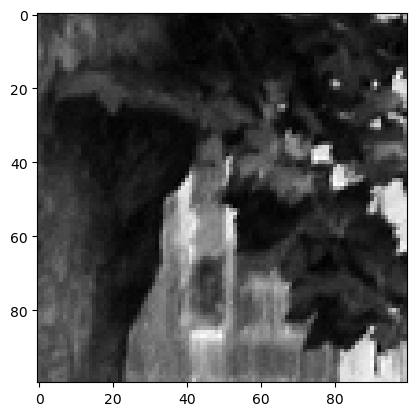

In [27]:
frame_selected = frames[img_names[1]][:100,:100]
plt.imshow(frame_selected, cmap="gray")

Text(0.5, 1.0, 'Reconstructed')

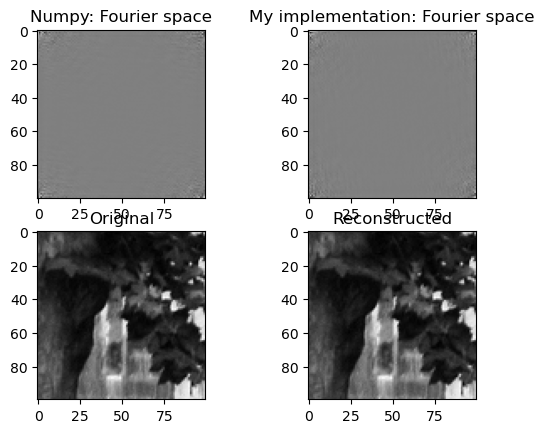

In [41]:
from tqdm import tqdm 

def fourier2d1(frame):

    x,y = np.meshgrid(np.arange(frame.shape[0]), np.arange(frame.shape[1]))

    fourier_space = np.zeros_like(frame, complex)
    for u in tqdm(range(frame.shape[0])):
        for v in range(frame.shape[1]):
            frequencies = x*u/frame.shape[0] + y*v/frame.shape[1]
            exponent = -2 * 1j * np.pi * frequencies 
            waves = np.exp(exponent)
            res = (frame * waves.T).sum()
            fourier_space[u,v] = res
    
    return fourier_space



def fourier2d2(frame):

    x,y = np.meshgrid(np.arange(frame.shape[0]), np.arange(frame.shape[1]))

    u = np.arange(frame.shape[0])
    v = np.arange(frame.shape[1])

    fourier_space = np.zeros_like(frame, complex)
    frequencies = (x[:,:, None]*u/frame.shape[0])[:,:,:, None] + (y[:,:, None]*v/frame.shape[1])[:,:,None]
    exponent = -2 * 1j * np.pi * frequencies 
    waves = np.exp(exponent)
    res = frame * waves
    fourier_space = res.sum(axis=(-2,-1))
    return fourier_space




def inverse_fourier2d(frame):
    x,y = np.meshgrid(np.arange(frame.shape[0]), np.arange(frame.shape[1]))
    u,v = np.arange(frame.shape[0]), np.arange(frame.shape[1])

    frequencies = (x[:,:, None]*u/frame.shape[0])[:,:,:, None] + (y[:,:, None]*v/frame.shape[1])[:,:,None]
    exponent = 2 * 1j * np.pi * frequencies 
    waves = np.exp(exponent)

    res = np.zeros_like(frame, complex)
    for i in range(frame.shape[0]):
        for j in range(frame.shape[1]):
            res += frame[i,j] * waves[i,j]

    res /= frame.shape[0]*frame.shape[1]
    return res




frame = frame_selected

fig, axes = plt.subplots(2,2)


frame_fourier2d = np.fft.fft2(frame_selected)
axes[0][0].imshow(frame_fourier2d.imag, cmap="gray")
axes[0][0].set_title("Numpy: Fourier space")

frame_fourier2d = fourier2d2(frame_selected)
axes[0][1].imshow(frame_fourier2d.imag, cmap="gray")
axes[0][1].set_title("My implementation: Fourier space")

axes[1][0].imshow(frame, cmap="gray")
axes[1][0].set_title("Original")


axes[1][1].imshow(inverse_fourier2d(frame_fourier2d).real, cmap="gray")
axes[1][1].set_title("Reconstructed")

Text(0.5, 1.0, 'Reconstructed')

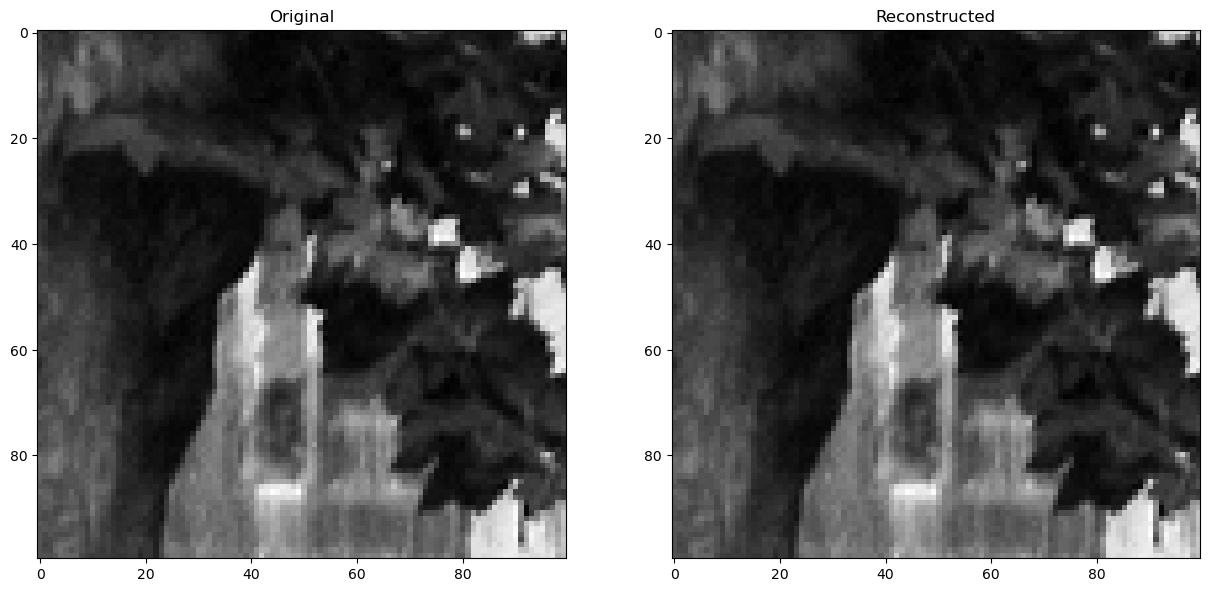

In [33]:
frame = frame_selected

x,y = np.meshgrid(np.arange(frame.shape[0]), np.arange(frame.shape[1]))
u,v = np.arange(frame.shape[0]), np.arange(frame.shape[1])

frequencies = (x[:,:, None]*u/frame.shape[0])[:,:,:, None] + (y[:,:, None]*v/frame.shape[1])[:,:,None]
exponent = 2 * 1j * np.pi * frequencies 
waves = np.exp(exponent)

res = np.zeros_like(frame, complex)
for i in range(frame.shape[0]):
    for j in range(frame.shape[1]):
        res += frame_fourier2d[i,j] * waves[i,j]

res /= frame.shape[0]*frame.shape[1]

fig, axes = plt.subplots(1,2, figsize=(15,10))


axes[0].imshow(frame, cmap="gray")
axes[0].set_title("Original")

axes[1].imshow(res.real.T, cmap="gray")
axes[1].set_title("Reconstructed")

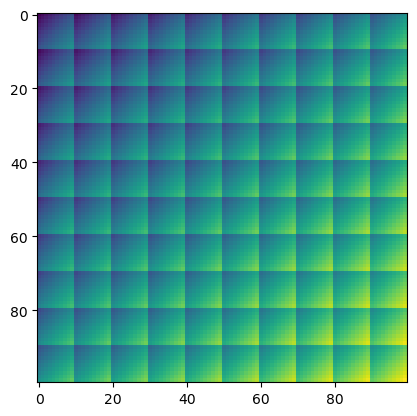

In [131]:
a = np.arange(10)[:, None] + np.arange(10)
x,y = np.meshgrid(a,a)
plt.imshow(x+y)

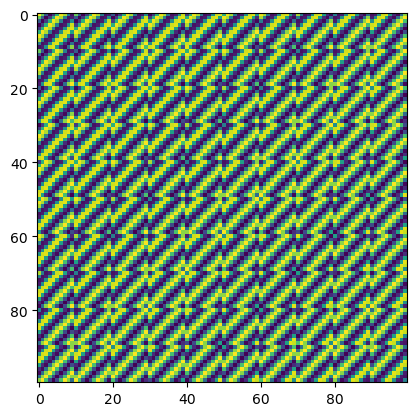

In [132]:
a = np.arange(10)[:, None] + np.arange(10)
x,y = np.meshgrid(a,a)
a = x + y 
a = np.cos(a) + 1j * np.sin(a)
plt.imshow(a.real)

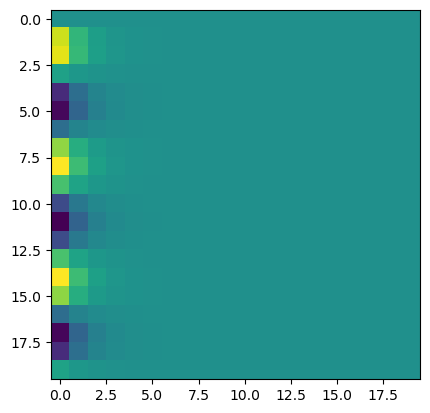

In [185]:
a = np.arange(20)[:, None] + 1j * np.arange(20)
a = np.cos(a) + 1j * np.sin(a)
plt.imshow(a.imag)

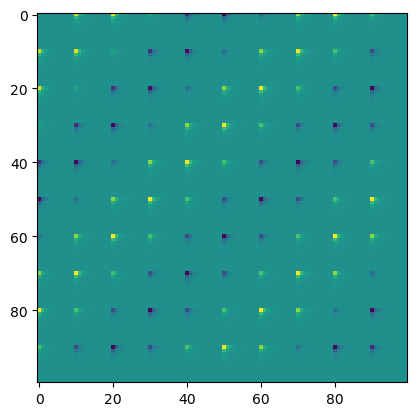

In [182]:
a = np.arange(10)[:, None] + 1j * np.arange(10)
x,y = np.meshgrid(a,a)
a = x+y
a = np.cos(a) + 1j * np.sin(a)
plt.imshow(a.imag)

$\displaystyle w_x=\mathrm{e}^{ix}=\cos{x}+\sin{ix}$

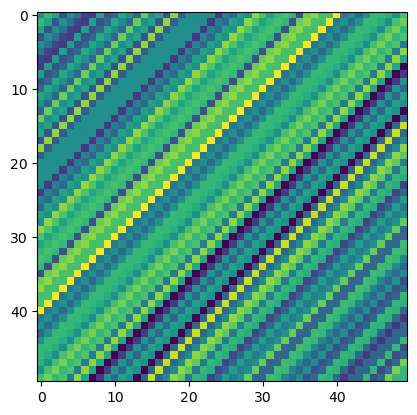

In [179]:
a = np.arange(50)[:,None] + np.arange(50)
a = np.exp(1j* a)


a = np.log(a)
plt.imshow(a.real)